In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
import os

mouse_drug_data_to_load = os.path.join("data","mouse_drug_data.csv")
clinical_trial_data_to_load =  os.path.join("data","clinicaltrial_data.csv")


# Read the Mouse and Drug Data and the Clinical Trial Data

mice_data=pd.read_csv(mouse_drug_data_to_load)
trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data=pd.merge(trial_data,mice_data,on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and store as a dataframe
avg_vol=data.groupby(["Drug","Timepoint"]).mean()

# format the DataFrame
avg_vol=avg_vol.reset_index()

# Preview DataFrame
avg_vol

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
...,...,...,...,...
95,Zoniferol,25,55.432935,1.687500
96,Zoniferol,30,57.713531,1.933333
97,Zoniferol,35,60.089372,2.285714
98,Zoniferol,40,62.916692,2.785714


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint as a dataframe
from scipy.stats import sem
sde_vol = data.groupby(["Drug","Timepoint"]).sem()

# Format the dataframe
sde_vol=sde_vol.iloc[:,2]
sde_vol=sde_vol.reset_index()

# Preview DataFrame
sde_vol


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
avg_vol_format=avg_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
avg_vol_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


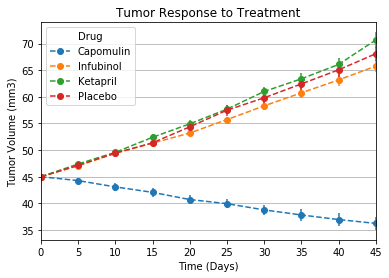

In [5]:
# Create a dataframe with only the four treatments to be plotted : Capomulin, Infubinol, Ketapril, and Placebo
avg_vol_final=avg_vol_format[["Capomulin","Infubinol","Ketapril","Placebo"]]
sde_vol_format=sde_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
sde_vol_final=sde_vol_format[["Capomulin","Infubinol","Ketapril","Placebo"]]


# Generate the Plot (with Error Bars)
fig1, ax1=plt.subplots()
avg_vol_final.plot(yerr=sde_vol_final, marker="o", ax=ax1, legend=True,linestyle="--")

# format the plot
ax1.set_title ("Tumor Response to Treatment")
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')

# Show the figure
plt.show()

# Save the Figure
path = os.path.join("Tumor Response to Treatment.png")
path
fig1.savefig(path)

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_sites=data.groupby(["Drug","Timepoint"]).mean()

# Grab Met.sites column
avg_sites=avg_sites[["Metastatic Sites"]]
avg_sites=avg_sites.reset_index()

# Preview DataFrame
avg_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sde_sites = data.groupby(["Drug","Timepoint"]).sem()

# Grab Met.Sites column
sde_sites=sde_sites[["Metastatic Sites"]]
sde_sites=sde_sites.reset_index()

# Preview DataFrame
sde_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
avg_sites_format=avg_sites.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
avg_sites_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


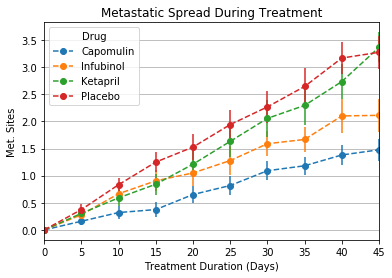

In [10]:
# Create a dataframe with only the four treatments to be plotted : Capomulin, Infubinol, Ketapril, and Placebo
avg_sites_final=avg_sites_format[["Capomulin","Infubinol","Ketapril","Placebo"]]
sde_sites_format=sde_sites.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
sde_sites_final=sde_sites_format[["Capomulin","Infubinol","Ketapril","Placebo"]]

# Generate the Plot (with Error Bars)
fig2, ax2=plt.subplots()
avg_sites_final.plot(yerr=sde_sites_final,linestyle="--",marker="o",ax=ax2)

# format the plot
ax2.set_title ("Metastatic Spread During Treatment")
ax2.set_xlabel("Treatment Duration (Days)")
ax2.set_ylabel("Met. Sites")
plt.grid(axis='y')

# show the figure
plt.show()

# Save the Figure

path = os.path.join("Metastatic Spread During Treatment.png")
path
fig2.savefig(path)


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice=data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# format the DataFrame
count_mice=count_mice.reset_index().rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
count_mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_format=count_mice.pivot(index="Timepoint",columns="Drug",values="Mouse Count")


# Preview the Data Frame
count_mice_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


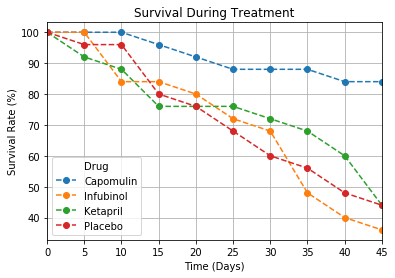

In [13]:
# convert the dataframe to survival rates in percent
mice_pct=count_mice_format*4

# Create a dataframe with only the four treatments to be plotted : Capomulin, Infubinol, Ketapril, and Placebo
mice_pct_final=mice_pct[["Capomulin","Infubinol","Ketapril","Placebo"]]

# Generate the Plot (Accounting for percentages)
fig3, ax3=plt.subplots()
mice_pct_final.plot(kind="line",ax=ax3, linestyle="--", marker="o")

# format the plot
ax3.set_title ("Survival During Treatment")
ax3.set_xlabel("Time (Days)")
ax3.set_ylabel("Survival Rate (%)")
plt.grid()


# Save the Figure
path = os.path.join("Survival During Treatment.png")
path
fig3.savefig(path)

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes of tumor volume for each drug
percent_change=[(avg_vol_final.iloc[9,i]-avg_vol_final.iloc[0,i])/avg_vol_final.iloc[0,i]*100 for i in np.arange(0,4)]

# Display the data to confirm
percent_change

[-19.475302667894155, 46.12347172785184, 57.02879468660604, 51.29796048315153]

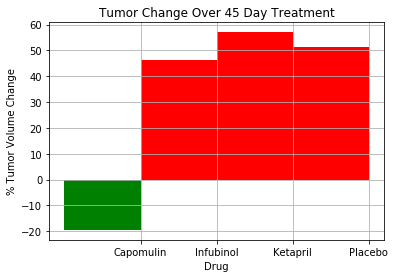

In [18]:
fig4, ax4=plt.subplots()
rect=ax4.bar(np.arange(0,4),percent_change,width=-1,align="edge",color=['g','r','r','r'],tick_label=["Capomulin","Infubinol","Ketapril","Placebo"])

# format the plot
ax4.set_title ("Tumor Change Over 45 Day Treatment")
ax4.set_xlabel("Drug")
ax4.set_ylabel("% Tumor Volume Change")
plt.grid()

# Save the Figure
path = os.path.join("Tumor Change Over 45 Day Treatment.png")
path
fig4.savefig(path)

# Show the Figure
plt.show()

Trend#1:
The sizes of tumor went down during the tratment for mices under Capomulin, whereas all other treatments went up.

Trend#2:
Mices under Capomulin have the slowest metatstatic spread of tumor during the treatment.

Trend#3:
Mices under Capomulin have the highest survival rate.